In [545]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

/kaggle/input/gogle-play-store/googleplaystore.csv


In [546]:
df=pd.read_csv("../input/gogle-play-store/googleplaystore.csv")#read the data

In [547]:
df.head()

App        Category  Rating Reviews  Size     Installs  Type Price Content Rating                     Genres      Last Updated         Current Ver   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0       Everyone               Art & Design   January 7, 2018               1.0.0  4.0.3 and up
1                                Coloring book moana  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0       Everyone  Art & Design;Pretend Play  January 15, 2018               2.0.0  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0       Everyone               Art & Design    August 1, 2018               1.2.4  4.0.3 and up
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0           Teen               Art & Design      June 8, 2018  Varies with device    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0       Everyone    Art & Design;Creativity     June 20, 2018                 1.1    4.4 and up

In [548]:
#let's check which information our data has
def check_df(df):
  print("**********head*************")
  print(df.head())
  print("**********tail*************")
  print(df.tail())
  print("**********info*************")
  print(df.info())
  print("**********columns*************")
  print(df.columns)
  print("**********null_values*************")
  print(df.isnull().values.any())  
  print("**********shape*************")
  print(df.shape)
  print("**********describe*************")
  print(df.describe().T)
  print("**********null_sum*************")
  print(df.isnull().sum())
check_df(df)

**********head*************
                                                 App        Category  Rating Reviews  Size     Installs  Type Price Content Rating                     Genres      Last Updated         Current Ver   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0       Everyone               Art & Design   January 7, 2018               1.0.0  4.0.3 and up
1                                Coloring book moana  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0       Everyone  Art & Design;Pretend Play  January 15, 2018               2.0.0  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0       Everyone               Art & Design    August 1, 2018               1.2.4  4.0.3 and up
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0           Teen  

In [549]:
#App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'
df.columns=df.columns.str.replace(" ","_")#clean the spaces between each elements of columns

In [550]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver'], dtype='object')

In [551]:
df.corr()

Rating
Rating     1.0

In [552]:
#in our dataset there is much NaN values, so if we wanna fill them we have to know some what is the mean-median values of columns which has NaN values.
print("min_of_rating:",df["Rating"].min())
print("mean_of_rating:",df["Rating"].mean())
print("median_of_rating:",df["Rating"].median())
print("max_of_rating:",df["Rating"].max())

min_of_rating: 1.0
mean_of_rating: 4.193338315362443
median_of_rating: 4.3
max_of_rating: 19.0


In [553]:
#df["Rating"].isnull().sum()>>1474 
# we will fill this null numbers with its median
df["Rating"].fillna(df["Rating"].median(),inplace=True)

In [554]:
# df["Rating"].isnull().sum()>>>0
df.describe().T

count      mean       std  min  25%  50%  75%   max
Rating  10841.0  4.207841  0.500893  1.0  4.1  4.3  4.5  19.0

In [555]:
df.dropna(inplace=True)        #lets drop Na values from dataset
df.isnull().sum()             # is there still null values in our dataset?>Yes:remove them
                                                                          #>No:Perfekt,go on... :)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


# **Data PreProcessing**

In [557]:
df["Category"].value_counts()

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

Text(0, 0.5, 'The Name of Categories')

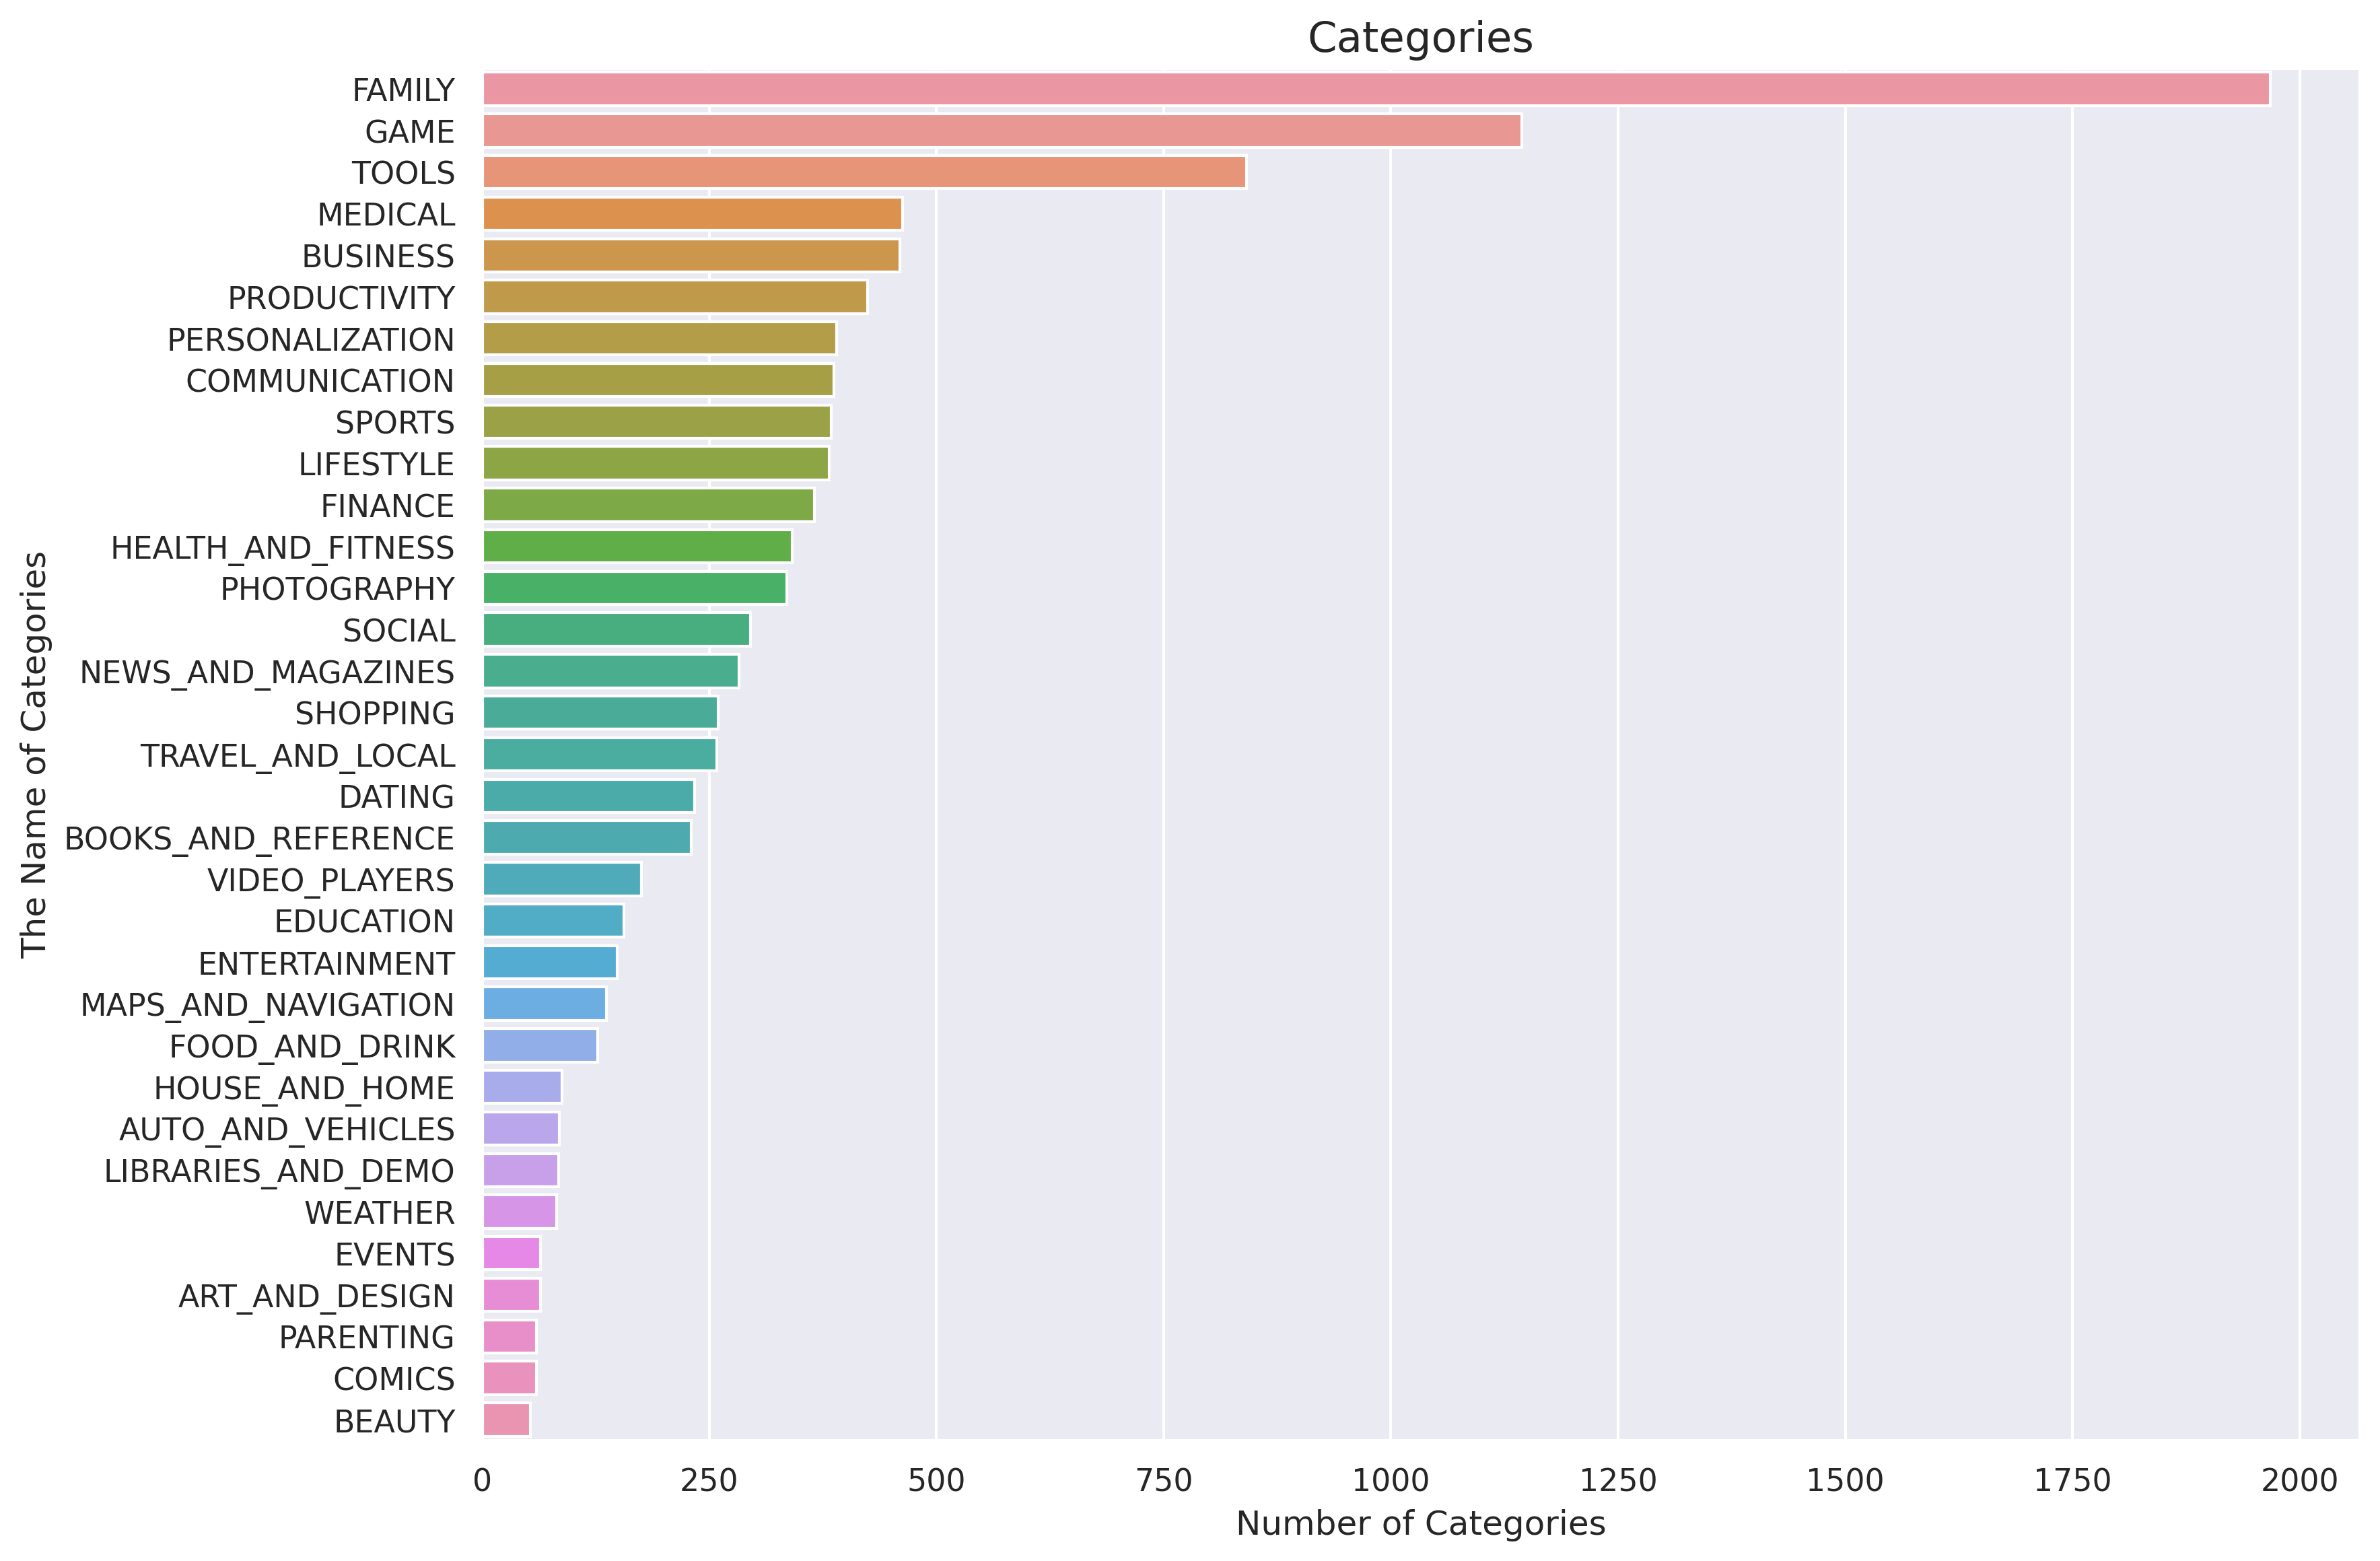

In [558]:
#lets try to visualize category values, so we cann see Family categories has more than others
category = df["Category"].value_counts()
sns.barplot(x = category, y = category.index, data = df)
plt.title("Categories", size=15)
plt.xlabel("Number of Categories")
plt.ylabel("The Name of Categories")

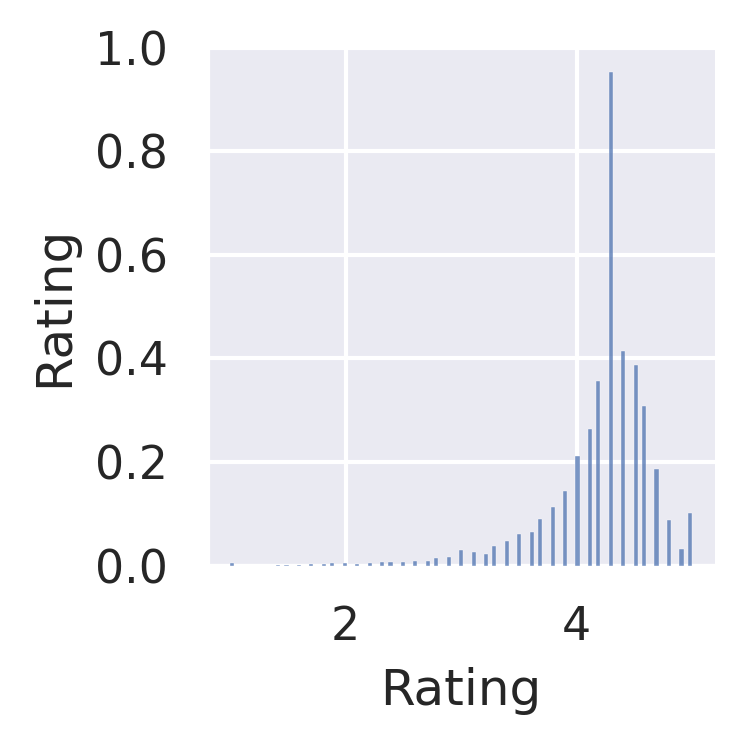

In [559]:
sns.pairplot(df)#4.3

Text(0.5, 1.0, 'Category & Price')

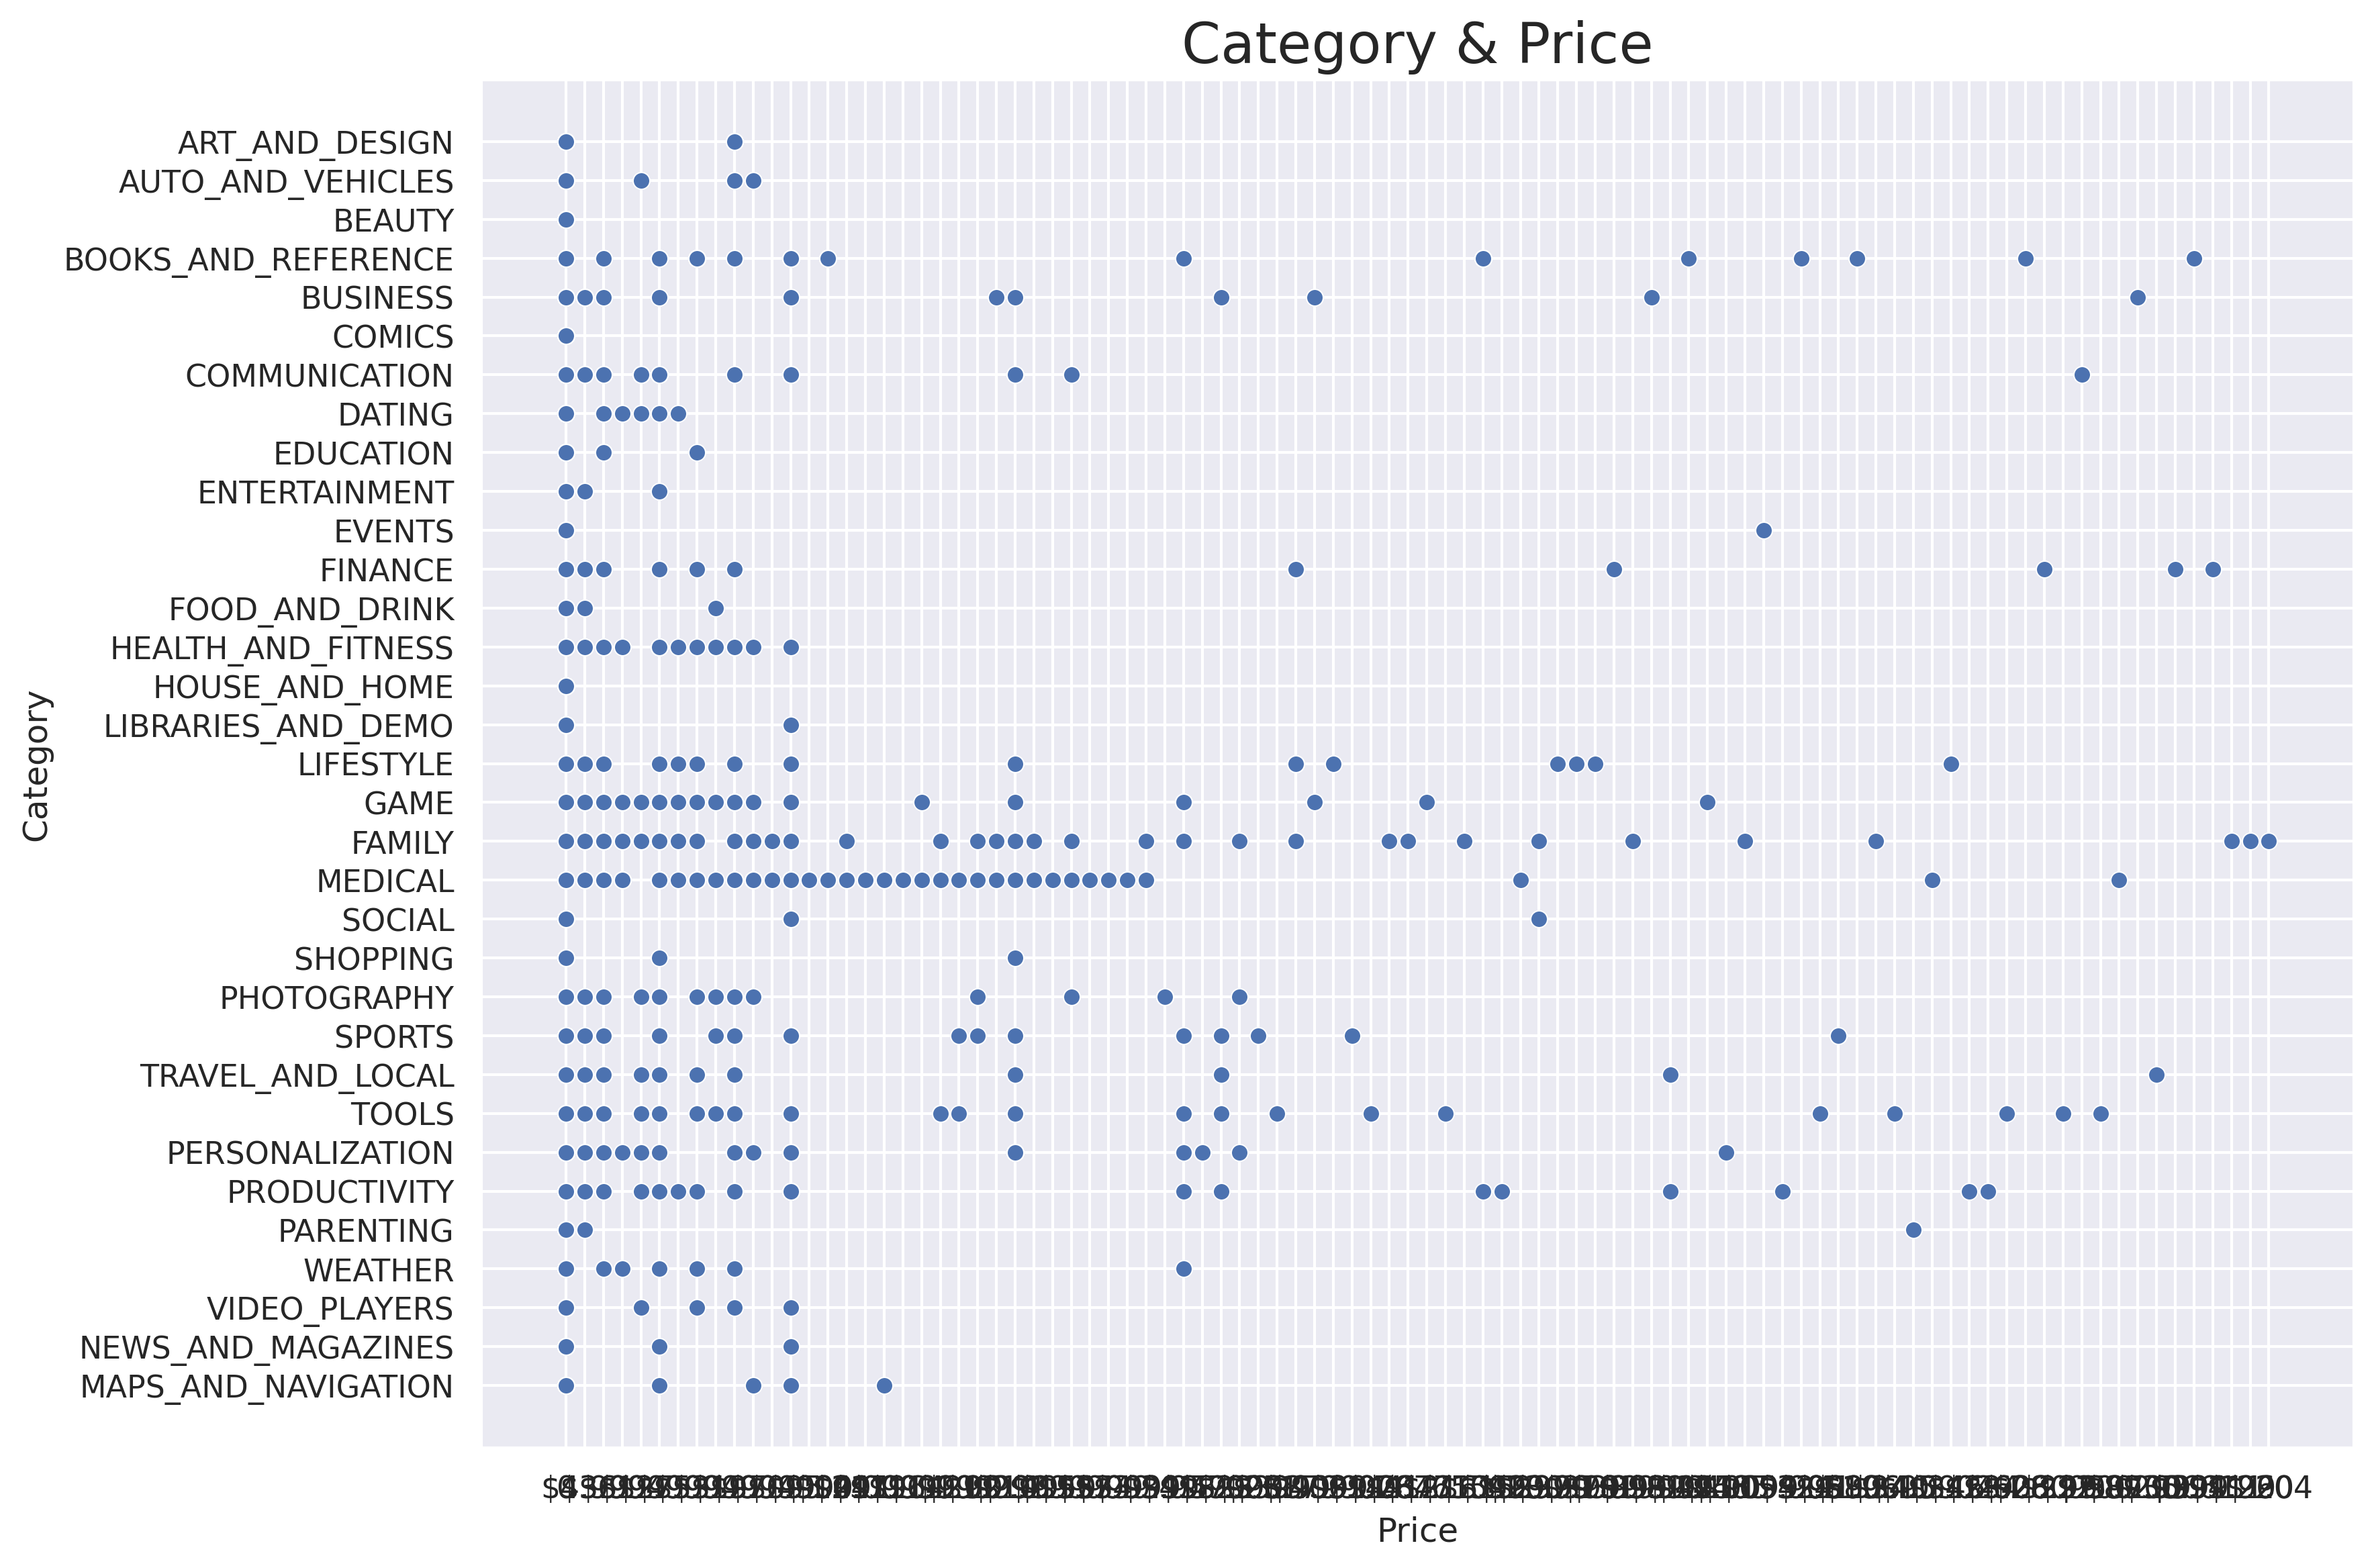

In [560]:
#lets try to visualize relationship between Category&Price>
sns.scatterplot(x = "Price",y="Category",data=df)
plt.title("Category & Price", size=20)

#as we see,developers become more money from >Books and reference,Business,Finance,Family,Medical....but it is still too early to decide which one bring more money

In [561]:
df.head(10)# M in Size make it hard to visualize


App        Category  Rating Reviews  Size     Installs  Type Price Content_Rating                     Genres        Last_Updated         Current_Ver   Android_Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0       Everyone               Art & Design     January 7, 2018               1.0.0  4.0.3 and up
1                                Coloring book moana  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0       Everyone  Art & Design;Pretend Play    January 15, 2018               2.0.0  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0       Everyone               Art & Design      August 1, 2018               1.2.4  4.0.3 and up
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0           Teen               Art & Design        June 8, 2018  Varies with device    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0       Everyone    Art & Design;Creativity       June 20, 2018                 1.1    4.4 and up
5                         Paper flowers instructions  ART_AND_DESIGN     4.4     167  5.6M      50,000+  Free     0       Everyone               Art & Design      March 26, 2017                 1.0    2.3 and up
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8     178   19M      50,000+  Free     0       Everyone               Art & Design      April 26, 2018                 1.1  4.0.3 and up
7                                   Infinite Painter  ART_AND_DESIGN     4.1   36815   29M   1,000,000+  Free     0       Everyone               Art & Design       June 14, 2018            6.1.61.1    4.2 and up
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   13791   33M   1,000,000+  Free     0       Everyone               Art & Design  September 20, 2017               2.9.2    3.0 and up
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7     121  3.1M      10,000+  Free     0       Everyone    Art & Design;Creativity        July 3, 2018                 2.8  4.0.3 and up

In [562]:
#so when we look our dtypes we see that almost all our features are objects and we have to change them into right type
#Reviews are integers and we will change them to int
df["Reviews"].dtypes
df["Reviews"]=df["Reviews"].astype("int16")


In [563]:
df["Reviews"].describe()

count    10829.000000
mean      1772.309539
std      12248.007476
min     -32748.000000
25%          2.000000
50%        139.000000
75%       5123.000000
max      32732.000000
Name: Reviews, dtype: float64

In [564]:
df["Size"].unique()

# it will be better to check unique values, cause sometimes there are values that are not appropriate. Like this>Varies with device

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [565]:
#oops there is a NaN in Size and it is a string, lets change it with mean of df["Size"]>>Varies with device
df[df["Size"]=="Varies with device"]

App             Category  Rating  Reviews                Size     Installs  Type Price Content_Rating             Genres        Last_Updated         Current_Ver         Android_Ver
37                                    Floor Plan Creator       ART_AND_DESIGN     4.1   -28897  Varies with device   5,000,000+  Free     0       Everyone       Art & Design       July 14, 2018  Varies with device        2.3.3 and up
42                            Textgram - write on photos       ART_AND_DESIGN     4.4   -32459  Varies with device  10,000,000+  Free     0       Everyone       Art & Design       July 30, 2018  Varies with device  Varies with device
52                         Used Cars and Trucks for Sale    AUTO_AND_VEHICLES     4.6    17057  Varies with device   1,000,000+  Free     0       Everyone    Auto & Vehicles       July 30, 2018  Varies with device  Varies with device
67                                    Ulysse Speedometer    AUTO_AND_VEHICLES     4.3   -25325  Varies with device   5,000,000+  Free     0       Everyone    Auto & Vehicles       July 30, 2018  Varies with device  Varies with device
68                                                REPUVE    AUTO_AND_VEHICLES     3.9      356  Varies with device     100,000+  Free     0       Everyone    Auto & Vehicles        May 25, 2018  Varies with device  Varies with device
...                                                  ...                  ...     ...      ...                 ...          ...   ...   ...            ...                ...                 ...                 ...                 ...
10713  My Earthquake Alerts - US & Worldwide Earthquakes              WEATHER     4.4     3471  Varies with device     100,000+  Free     0       Everyone            Weather       July 24, 2018  Varies with device  Varies with device
10725                                          Posta App  MAPS_AND_NAVIGATION     3.6        8  Varies with device       1,000+  Free     0       Everyone  Maps & Navigation  September 27, 2017  Varies with device          4.4 and up
10765                    Chat For Strangers - Video Chat               SOCIAL     3.4      622  Varies with device     100,000+  Free     0     Mature 17+             Social        May 23, 2018  Varies with device  Varies with device
10826          Frim: get new friends on local chat rooms               SOCIAL     4.0    22950  Varies with device   5,000,000+  Free     0     Mature 17+             Social      March 23, 2018  Varies with device  Varies with device
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE     4.5      114  Varies with device       1,000+  Free     0     Mature 17+  Books & Reference    January 19, 2015  Varies with device  Varies with device

[1694 rows x 13 columns]

In [566]:
#we replace all M,k which is not a number..
df["Size"].replace("M","",regex=True,inplace=True)
df["Size"].replace("k","",regex=True,inplace=True)

#here we take all values except "Varies with device" and instead of this value we will assing df["Size"].mean instead of "Varies  with device"
mean_of_size=df[~df["Size"].str.contains("Varies with device",na=False)]# take all except "Varies with device"
m_o_s=mean_of_size["Size"].astype(float).mean()# take mean of it

df["Size"].replace("Varies with device",m_o_s,inplace=True)

In [567]:
df["Size"].dtype #>Object
df["Size"]=pd.to_numeric(df["Size"]) #df[Size]=>float64
df["Size"].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [568]:
df.describe().T

count         mean           std      min  25%    50%          75%      max
Rating   10829.0     4.206510      0.480467      1.0  4.1    4.3     4.500000      5.0
Reviews  10829.0  1772.309539  12248.007476 -32748.0  2.0  139.0  5123.000000  32732.0
Size     10829.0    36.947499     90.623432      1.0  6.8   20.0    36.947499   1020.0

In [569]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [570]:
#Replace all $ with nothing :)
df["Price"]=df["Price"].str.replace("$","")
df["Price"].unique()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [571]:
df["Price"]=df["Price"].astype(float)#changing type of it. Object>float

In [572]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int16
Size              float64
Installs           object
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [573]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [574]:
#replace 
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

In [575]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [576]:
#we have now relationship between each features. Because we changed their type> if you go up you and look at df.corr() you will understand it clearly what i mean
df.describe()

Rating       Reviews          Size      Installs         Price
count  10829.000000  10829.000000  10829.000000  1.082900e+04  10829.000000
mean       4.206510   1772.309539     36.947499  1.547990e+07      1.028091
std        0.480467  12248.007476     90.623432  8.507114e+07     15.957778
min        1.000000 -32748.000000      1.000000  0.000000e+00      0.000000
25%        4.100000      2.000000      6.800000  5.000000e+03      0.000000
50%        4.300000    139.000000     20.000000  1.000000e+05      0.000000
75%        4.500000   5123.000000     36.947499  5.000000e+06      0.000000
max        5.000000  32732.000000   1020.000000  1.000000e+09    400.000000

In [577]:
df["Genres"].value_counts()

Tools                                840
Entertainment                        622
Education                            548
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

In [578]:
df["Last_Updated"].head()
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [579]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int16
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
dtype: object

In [580]:
# grouping by price

df.groupby("Category").agg({"Price":"sum"}).sort_values("Price",ascending=False).head(10)

#list of the top money-makers
#that gives developers information about which apps need to be built

Price
Category                
FINANCE          2900.83
FAMILY           2433.79
LIFESTYLE        2360.87
MEDICAL          1439.96
GAME              287.30
TOOLS             266.26
PRODUCTIVITY      250.93
BUSINESS          185.27
PERSONALIZATION   152.47
PHOTOGRAPHY       134.21

In [581]:
# grouping by Installs

df.groupby("Category").agg({"Installs":"mean"}).head()

Installs
Category                         
ART_AND_DESIGN       1.942705e+06
AUTO_AND_VEHICLES    6.250613e+05
BEAUTY               5.131519e+05
BOOKS_AND_REFERENCE  8.354211e+06
BUSINESS             2.178076e+06

In [582]:
df.describe()

Rating       Reviews          Size      Installs         Price
count  10829.000000  10829.000000  10829.000000  1.082900e+04  10829.000000
mean       4.206510   1772.309539     36.947499  1.547990e+07      1.028091
std        0.480467  12248.007476     90.623432  8.507114e+07     15.957778
min        1.000000 -32748.000000      1.000000  0.000000e+00      0.000000
25%        4.100000      2.000000      6.800000  5.000000e+03      0.000000
50%        4.300000    139.000000     20.000000  1.000000e+05      0.000000
75%        4.500000   5123.000000     36.947499  5.000000e+06      0.000000
max        5.000000  32732.000000   1020.000000  1.000000e+09    400.000000

In [583]:
# grouping by Size
df.groupby("Category").agg({"Size":"mean"}).head()

Size
Category                      
ART_AND_DESIGN       13.674101
AUTO_AND_VEHICLES    34.790294
BEAUTY               16.416698
BOOKS_AND_REFERENCE  37.161369
BUSINESS             27.969239

In [584]:
#grouping by Reviews
df.groupby("Category").agg({"Reviews":"sum"}).head()

Reviews
Category                      
ART_AND_DESIGN         10449.0
AUTO_AND_VEHICLES     115090.0
BEAUTY                 68560.0
BOOKS_AND_REFERENCE   463253.0
BUSINESS             1043960.0

In [585]:
df.head()

App        Category  Rating  Reviews  Size  Installs  Type  Price Content_Rating                     Genres Last_Updated         Current_Ver   Android_Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1      159  19.0     10000  Free    0.0       Everyone               Art & Design   2018-01-07               1.0.0  4.0.3 and up
1                                Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7    21974   8.7   5000000  Free    0.0       Everyone               Art & Design   2018-08-01               1.2.4  4.0.3 and up
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5    19036  25.0  50000000  Free    0.0           Teen               Art & Design   2018-06-08  Varies with device    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3      967   2.8    100000  Free    0.0       Everyone    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

# Data visualization

<AxesSubplot:>

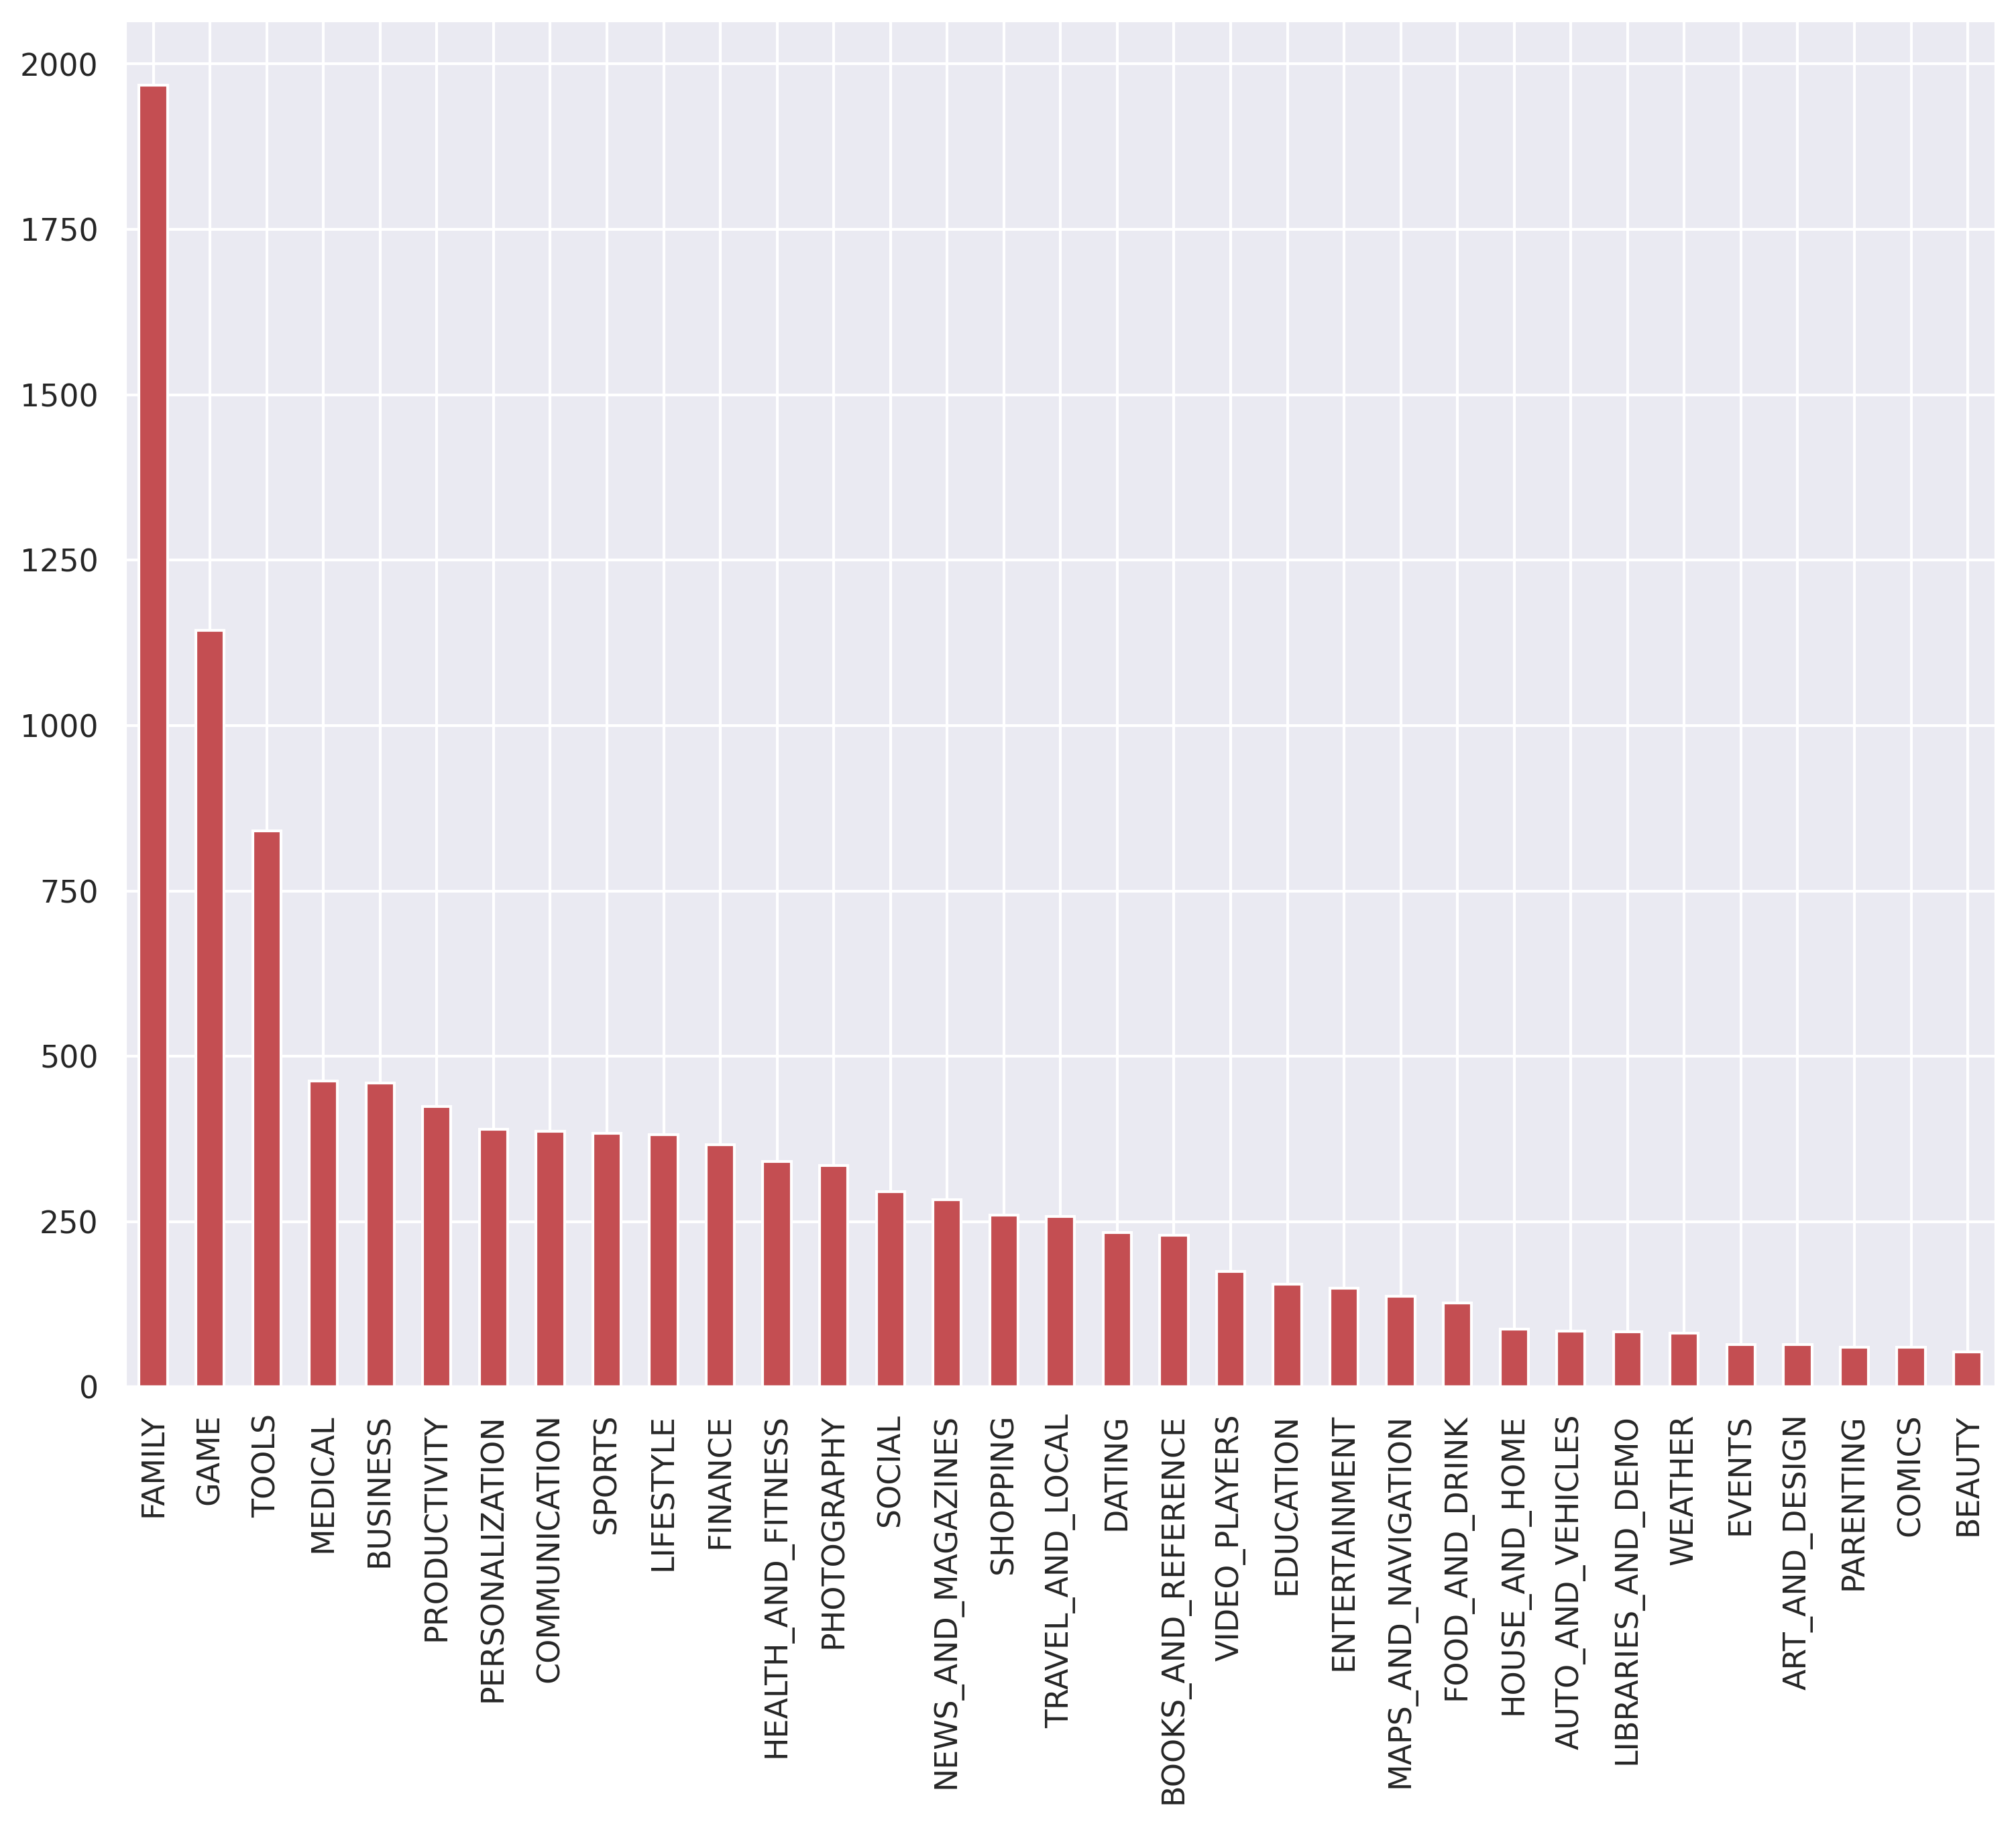

In [586]:
df["Category"].value_counts().plot(kind="bar",color="r")

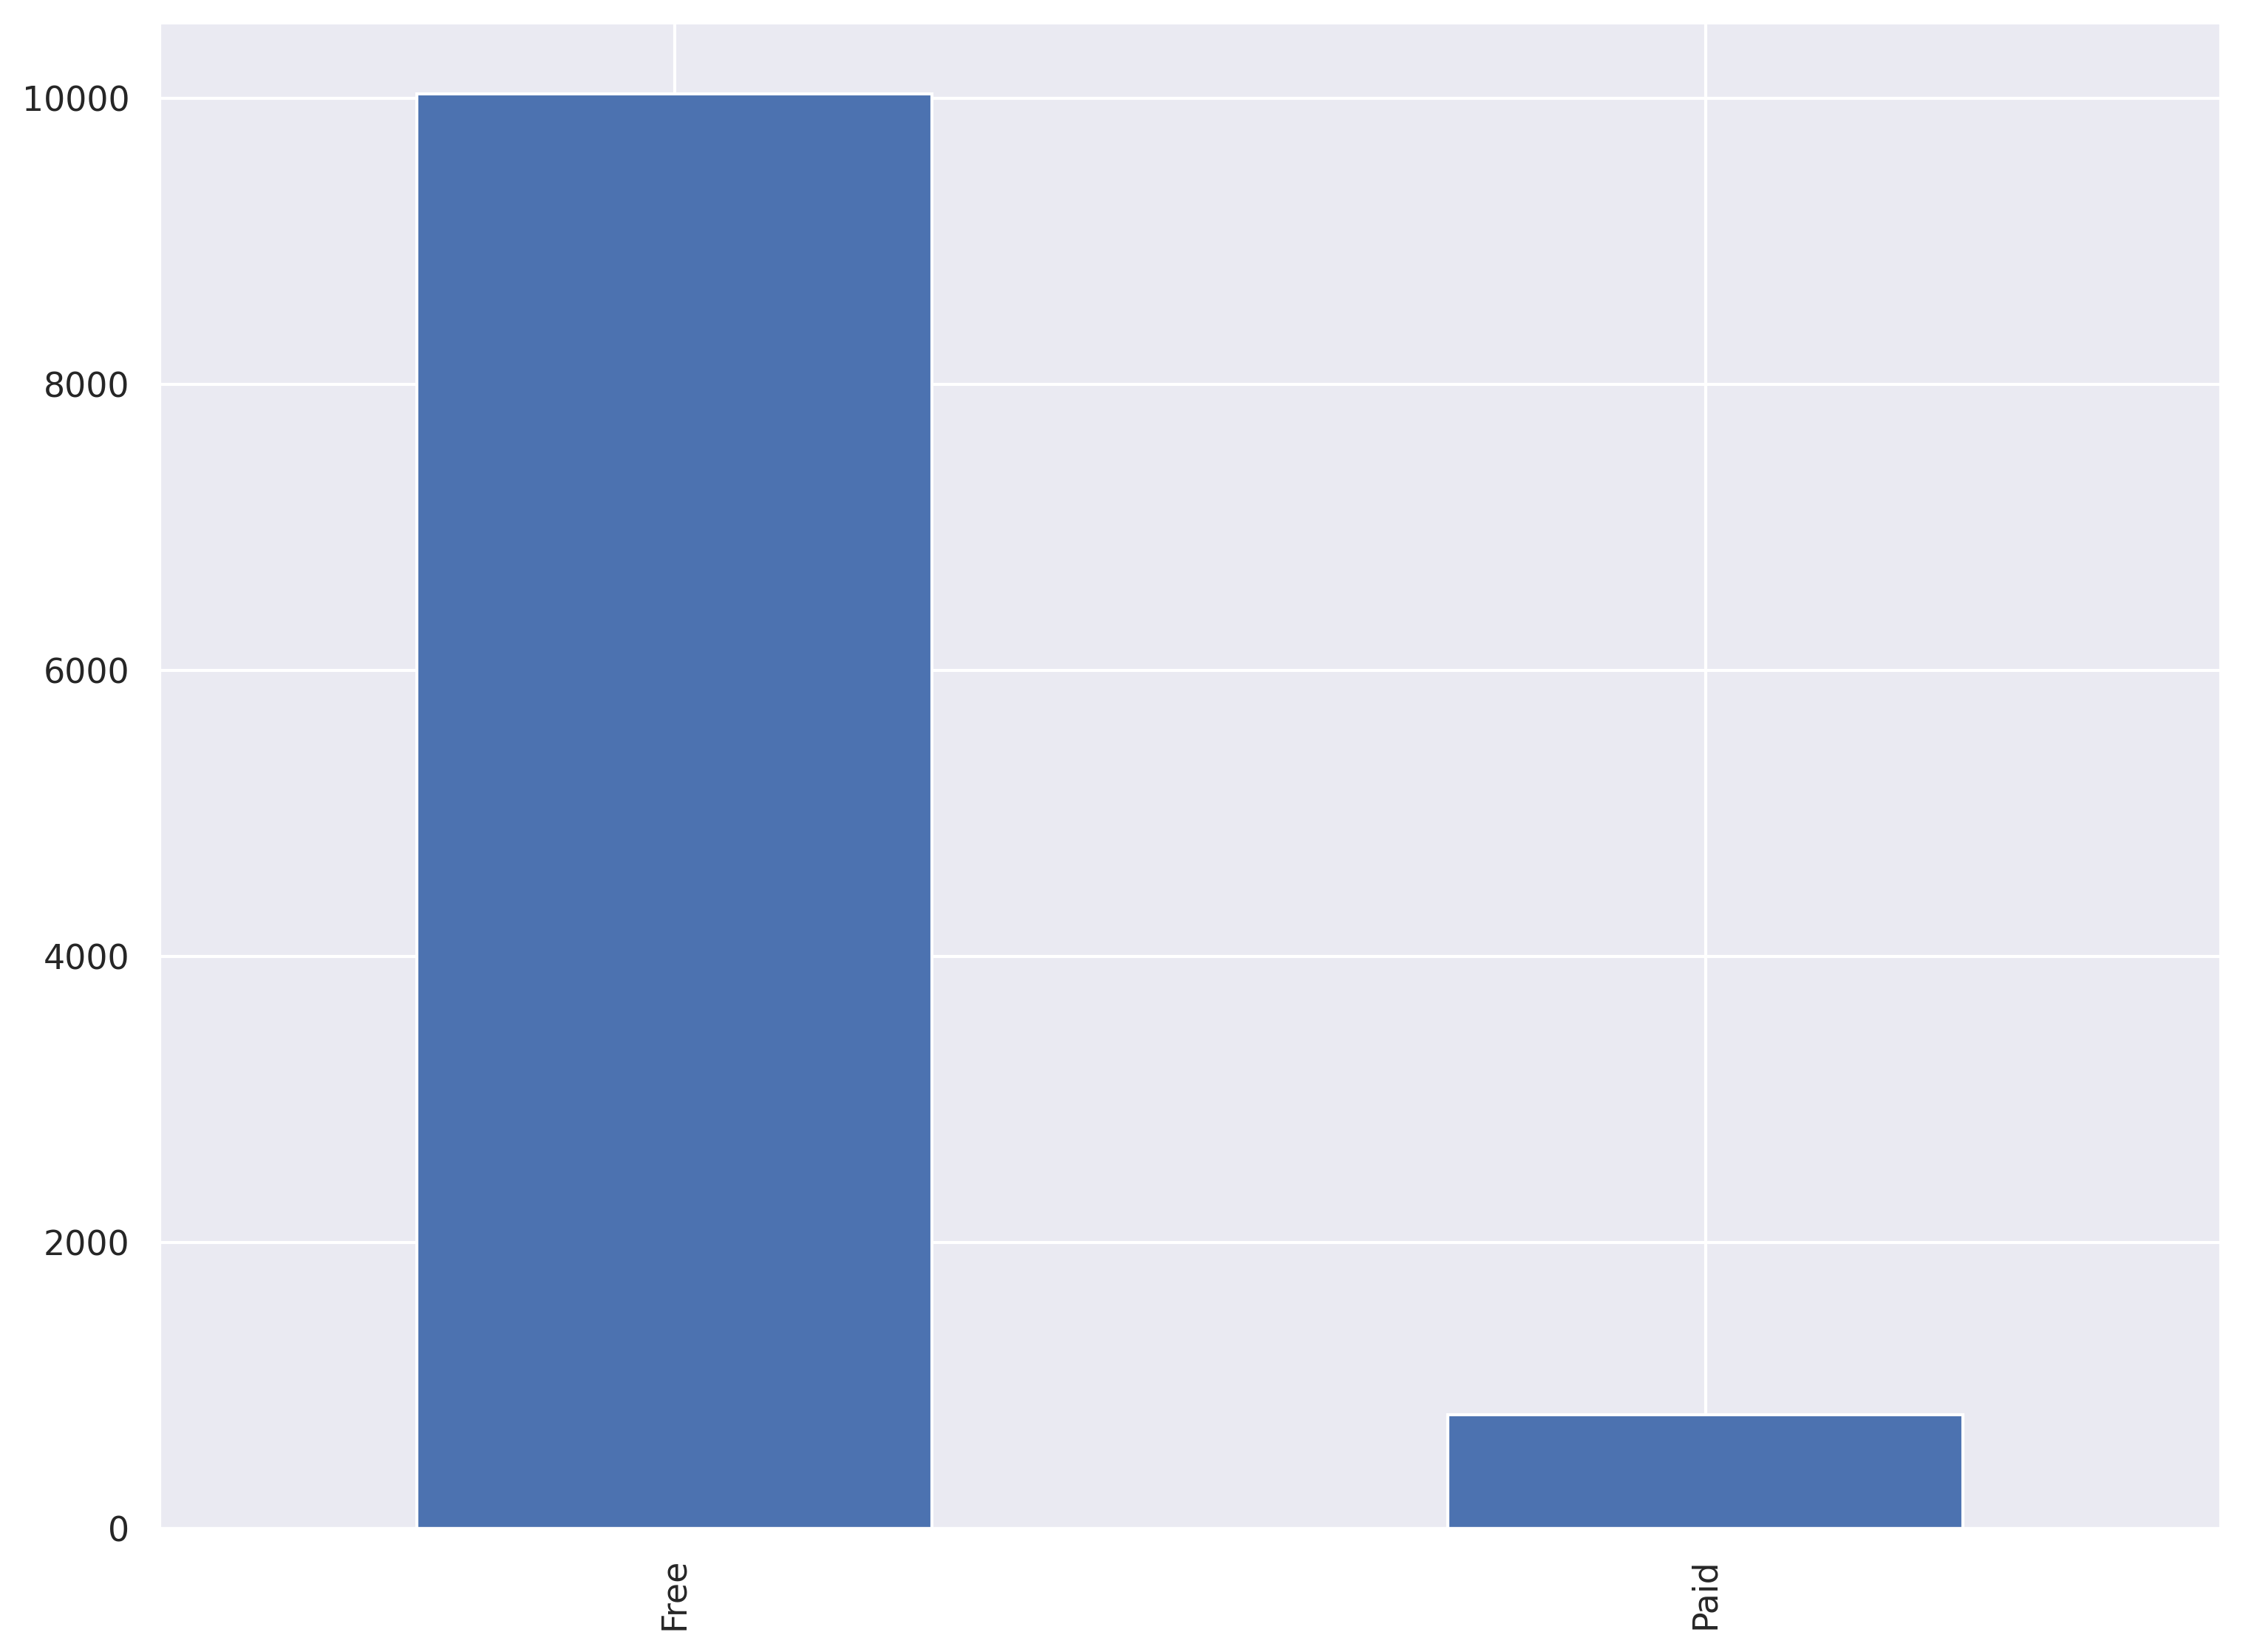

In [587]:
def plot_ciz(x):
    df[x].value_counts().plot(kind="bar",color="b")

    
plot_ciz("Type")

In [588]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver'], dtype='object')

In [589]:
df.value_counts()

App                                                 Category          Rating  Reviews  Size       Installs   Type  Price  Content_Rating  Genres                       Last_Updated  Current_Ver         Android_Ver       
Nick                                                ENTERTAINMENT     4.2     -7793    25.000000  10000000   Free  0.0    Everyone 10+    Entertainment;Music & Video  2018-01-24    2.0.8               4.4 and up            4
eBay: Buy & Sell this Summer - Discover Deals Now!  SHOPPING          4.4     -29125   36.947499  100000000  Free  0.0    Teen            Shopping                     2018-07-30    Varies with device  Varies with device    4
Skyscanner                                          TRAVEL_AND_LOCAL  4.5      22794   29.000000  10000000   Free  0.0    Everyone        Travel & Local               2018-08-06    5.48                4.4 and up            4
WatchESPN                                           SPORTS            4.1      26665   6.600000   1000000

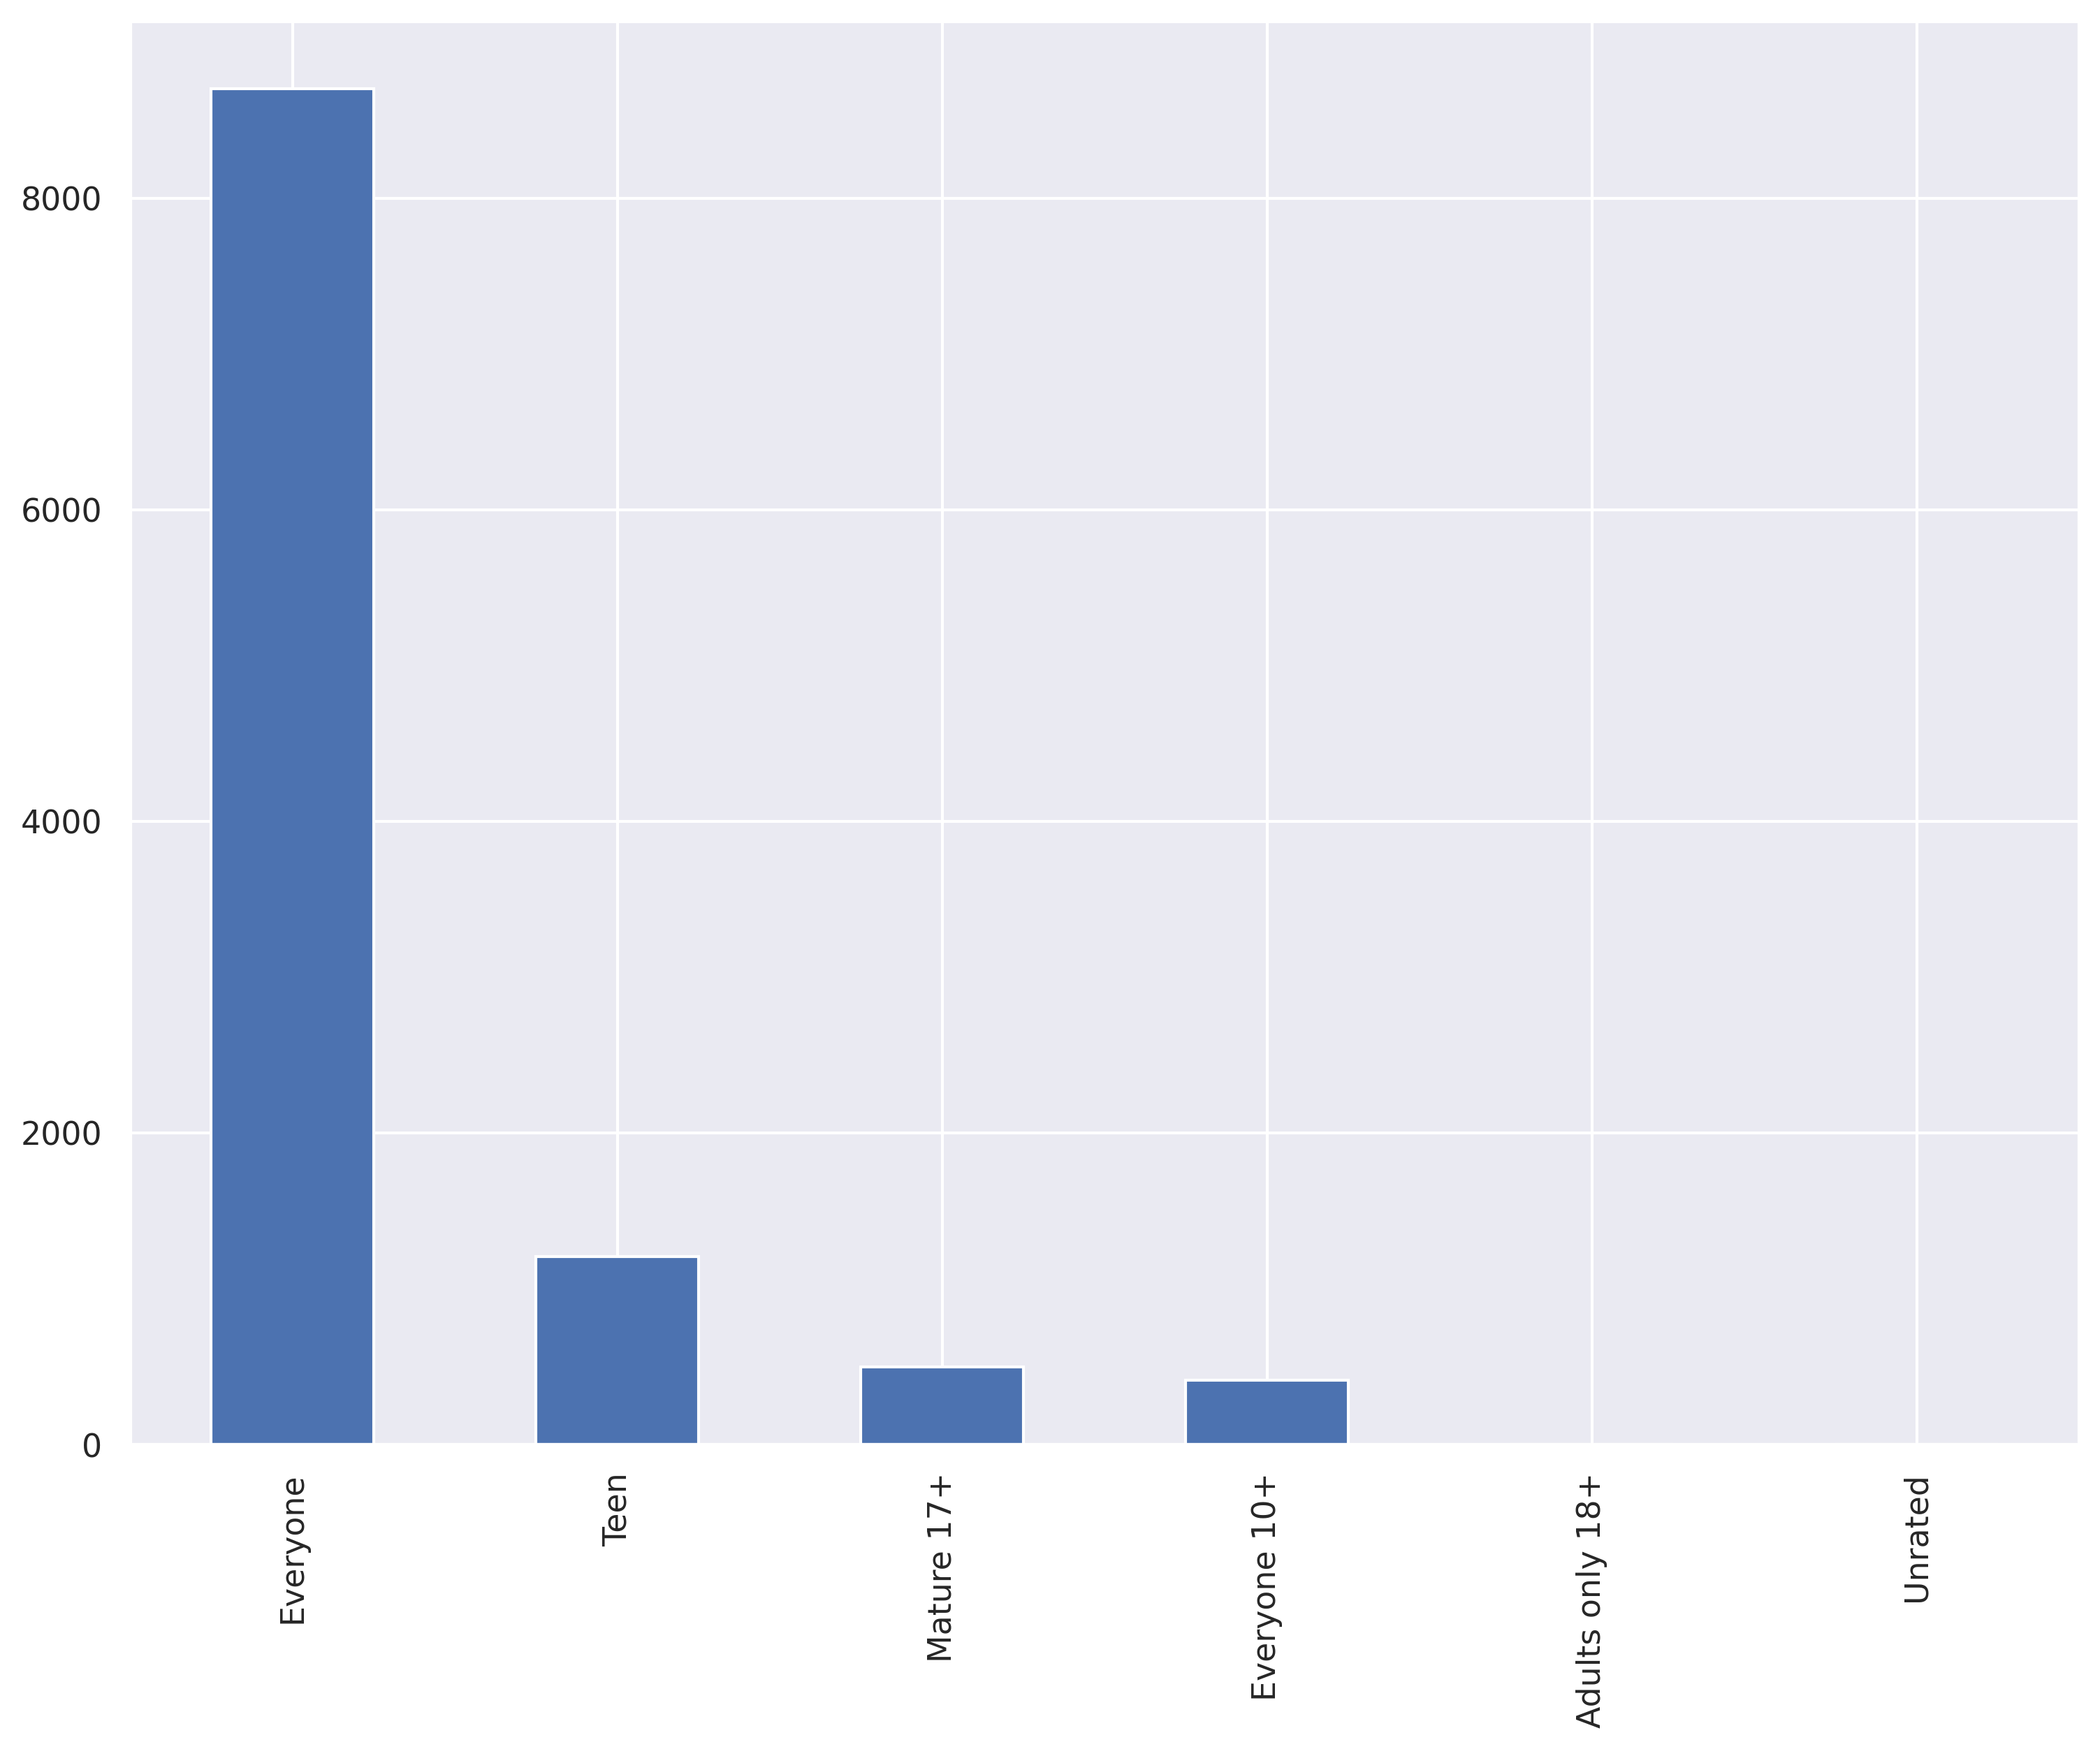

In [590]:
plot_ciz("Content_Rating")

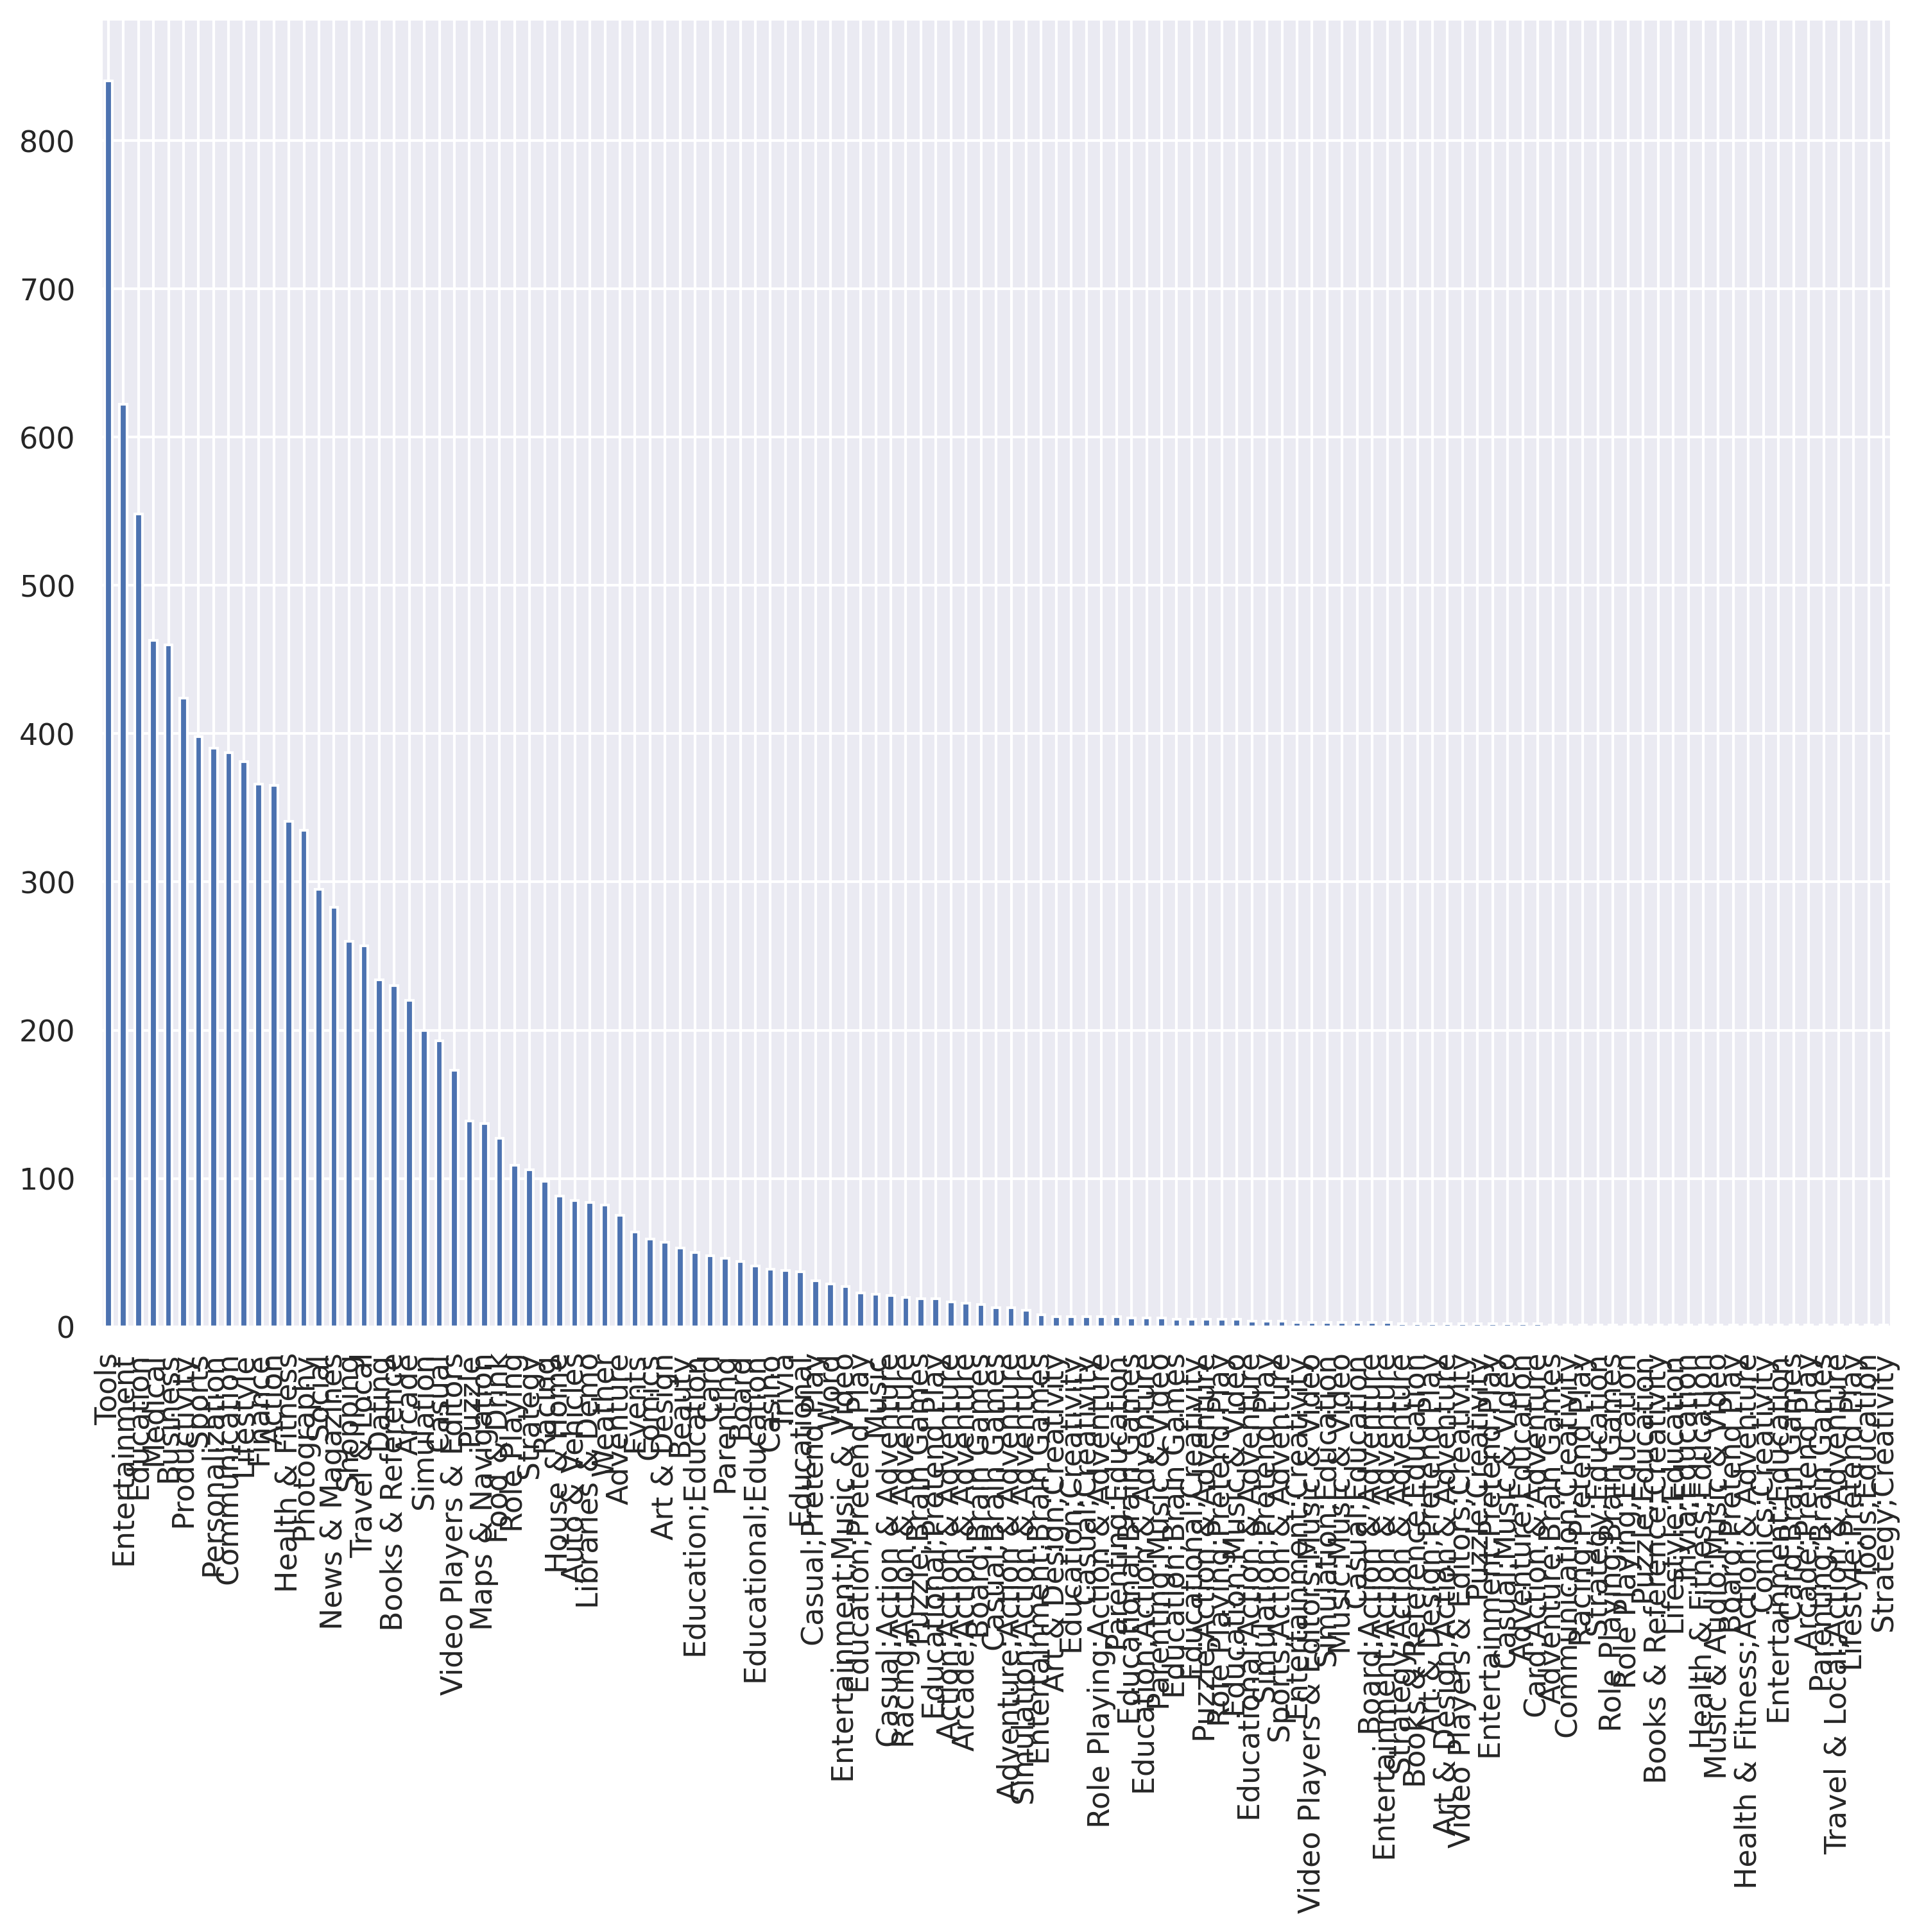

In [591]:
plot_ciz("Genres")

In [592]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver'], dtype='object')

Text(0.5, 1.0, 'Correlation between different fearures')

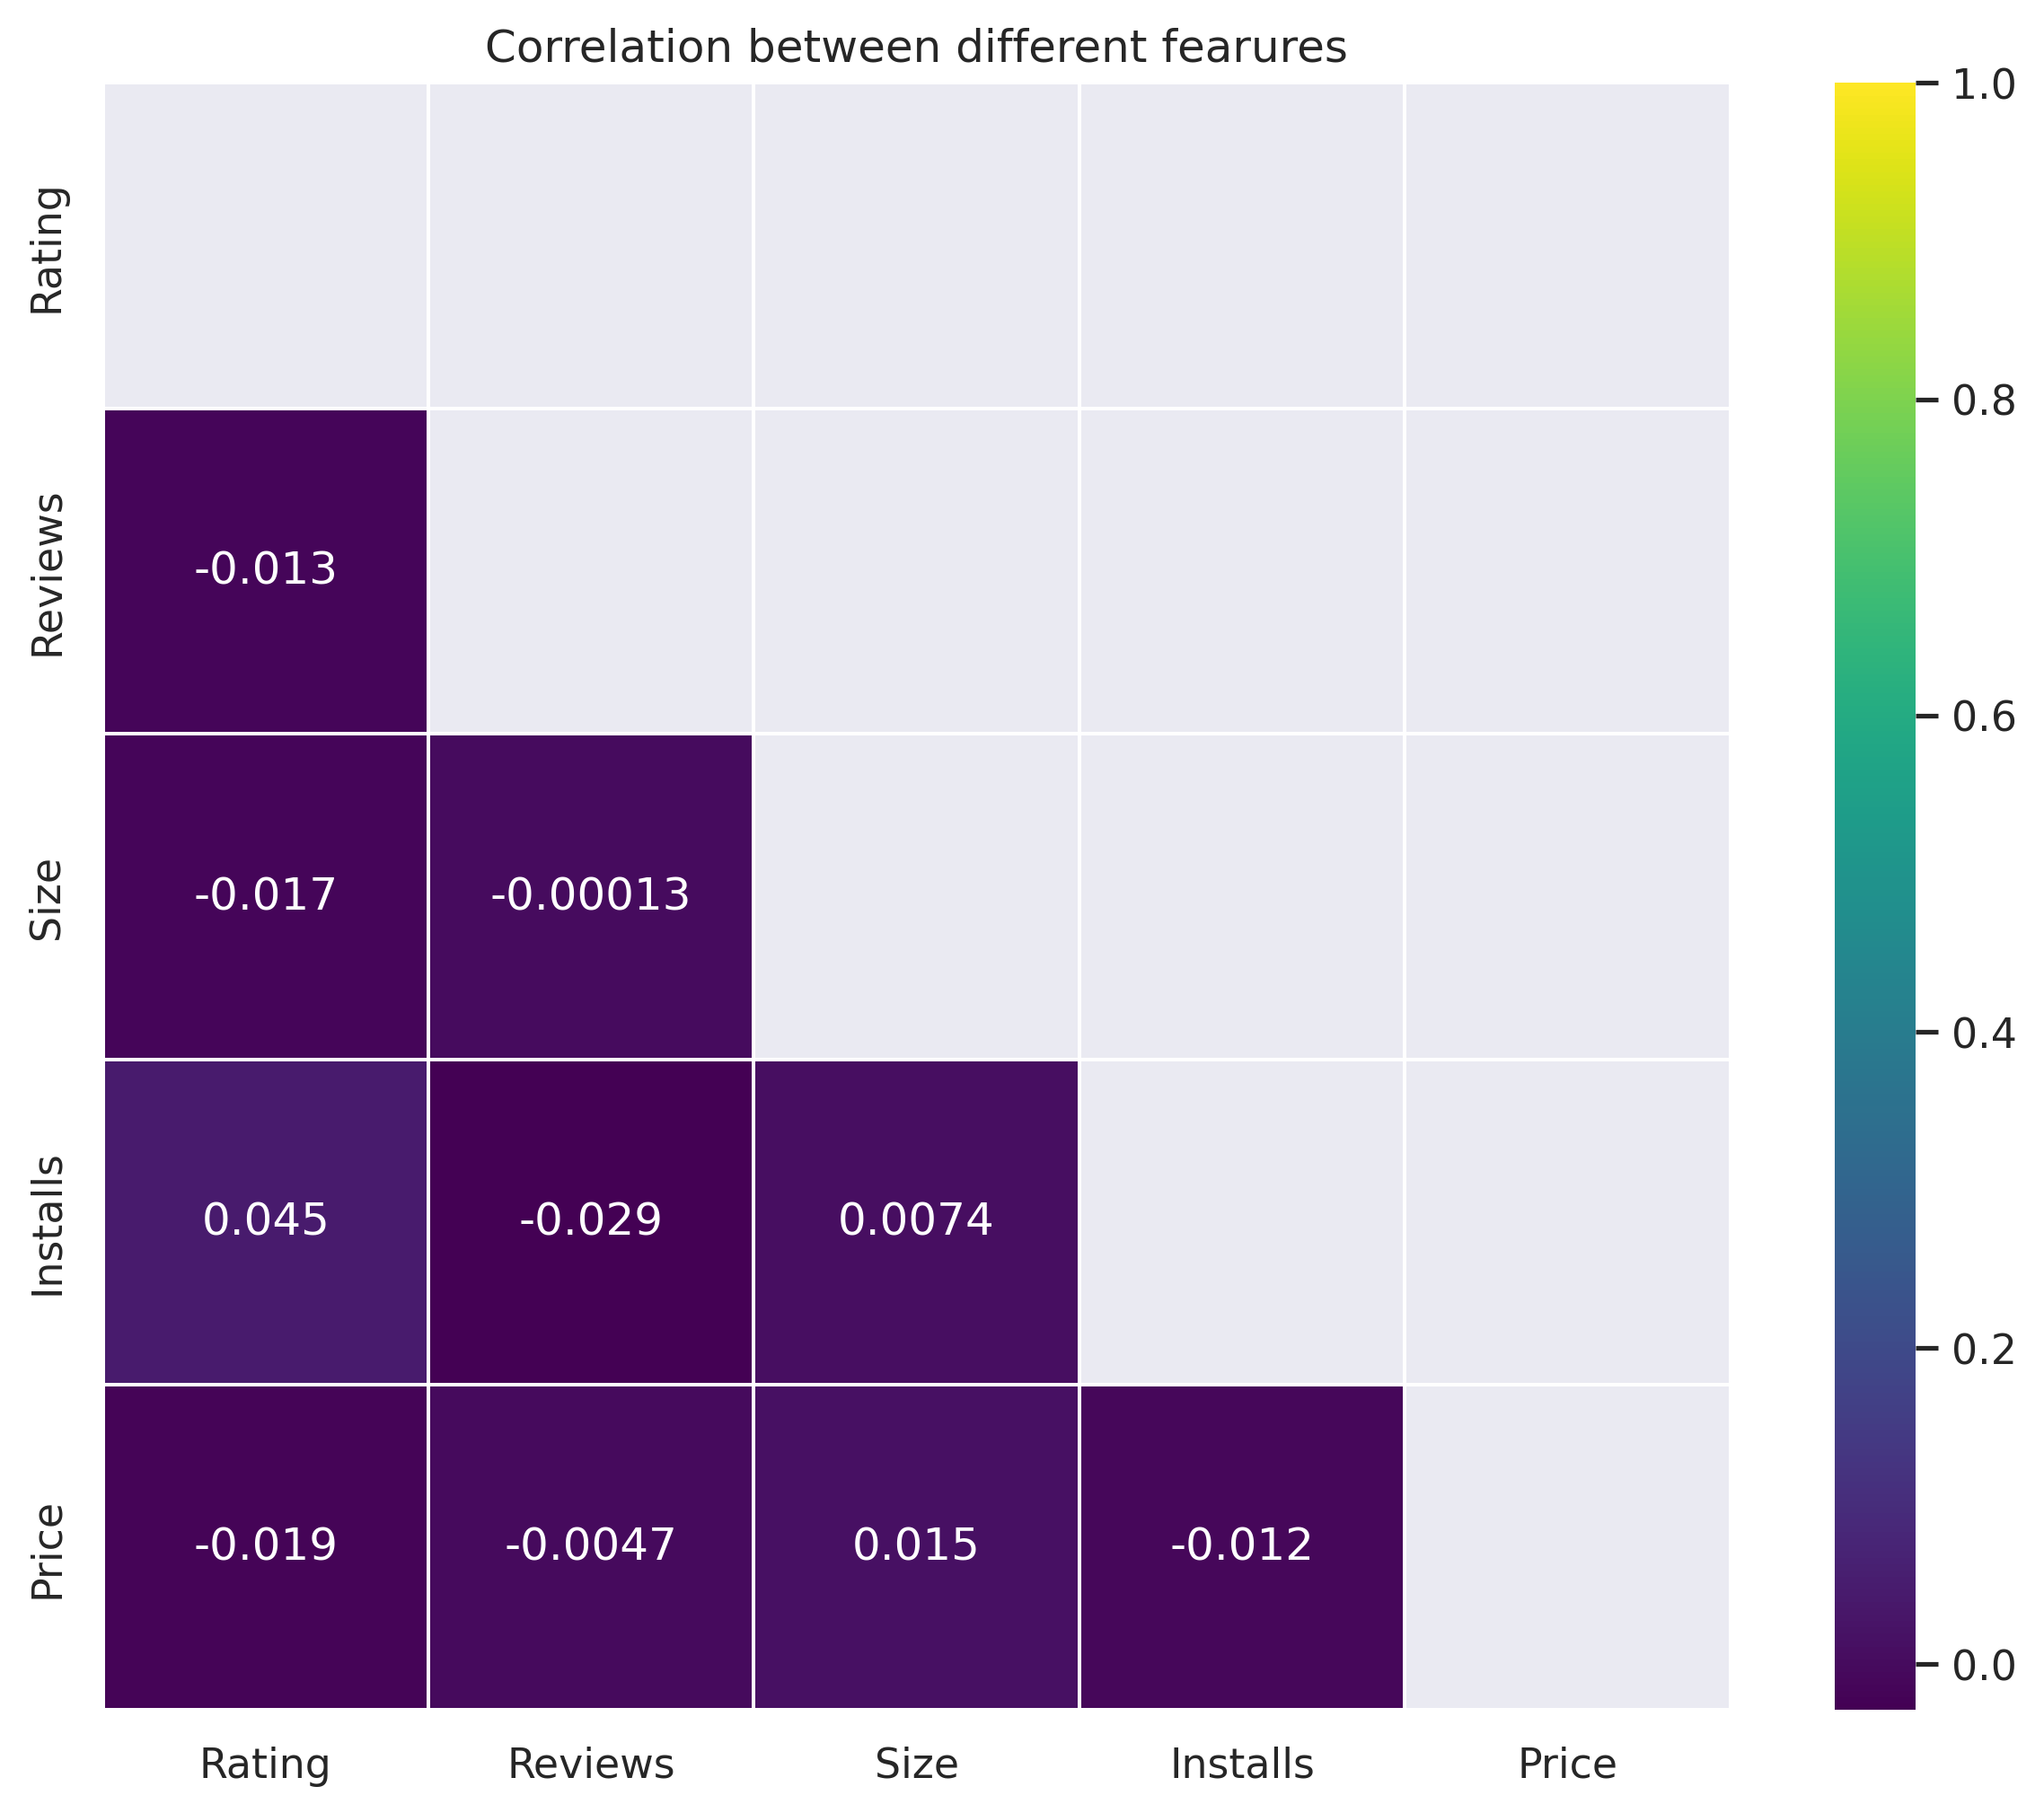

In [593]:
mask = np.zeros_like(df.corr())
mask[np.tril_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, vmax=1,linewidths=0.5, square=True,annot=True,cmap='viridis', mask=mask.T)

plt.title('Correlation between different fearures')

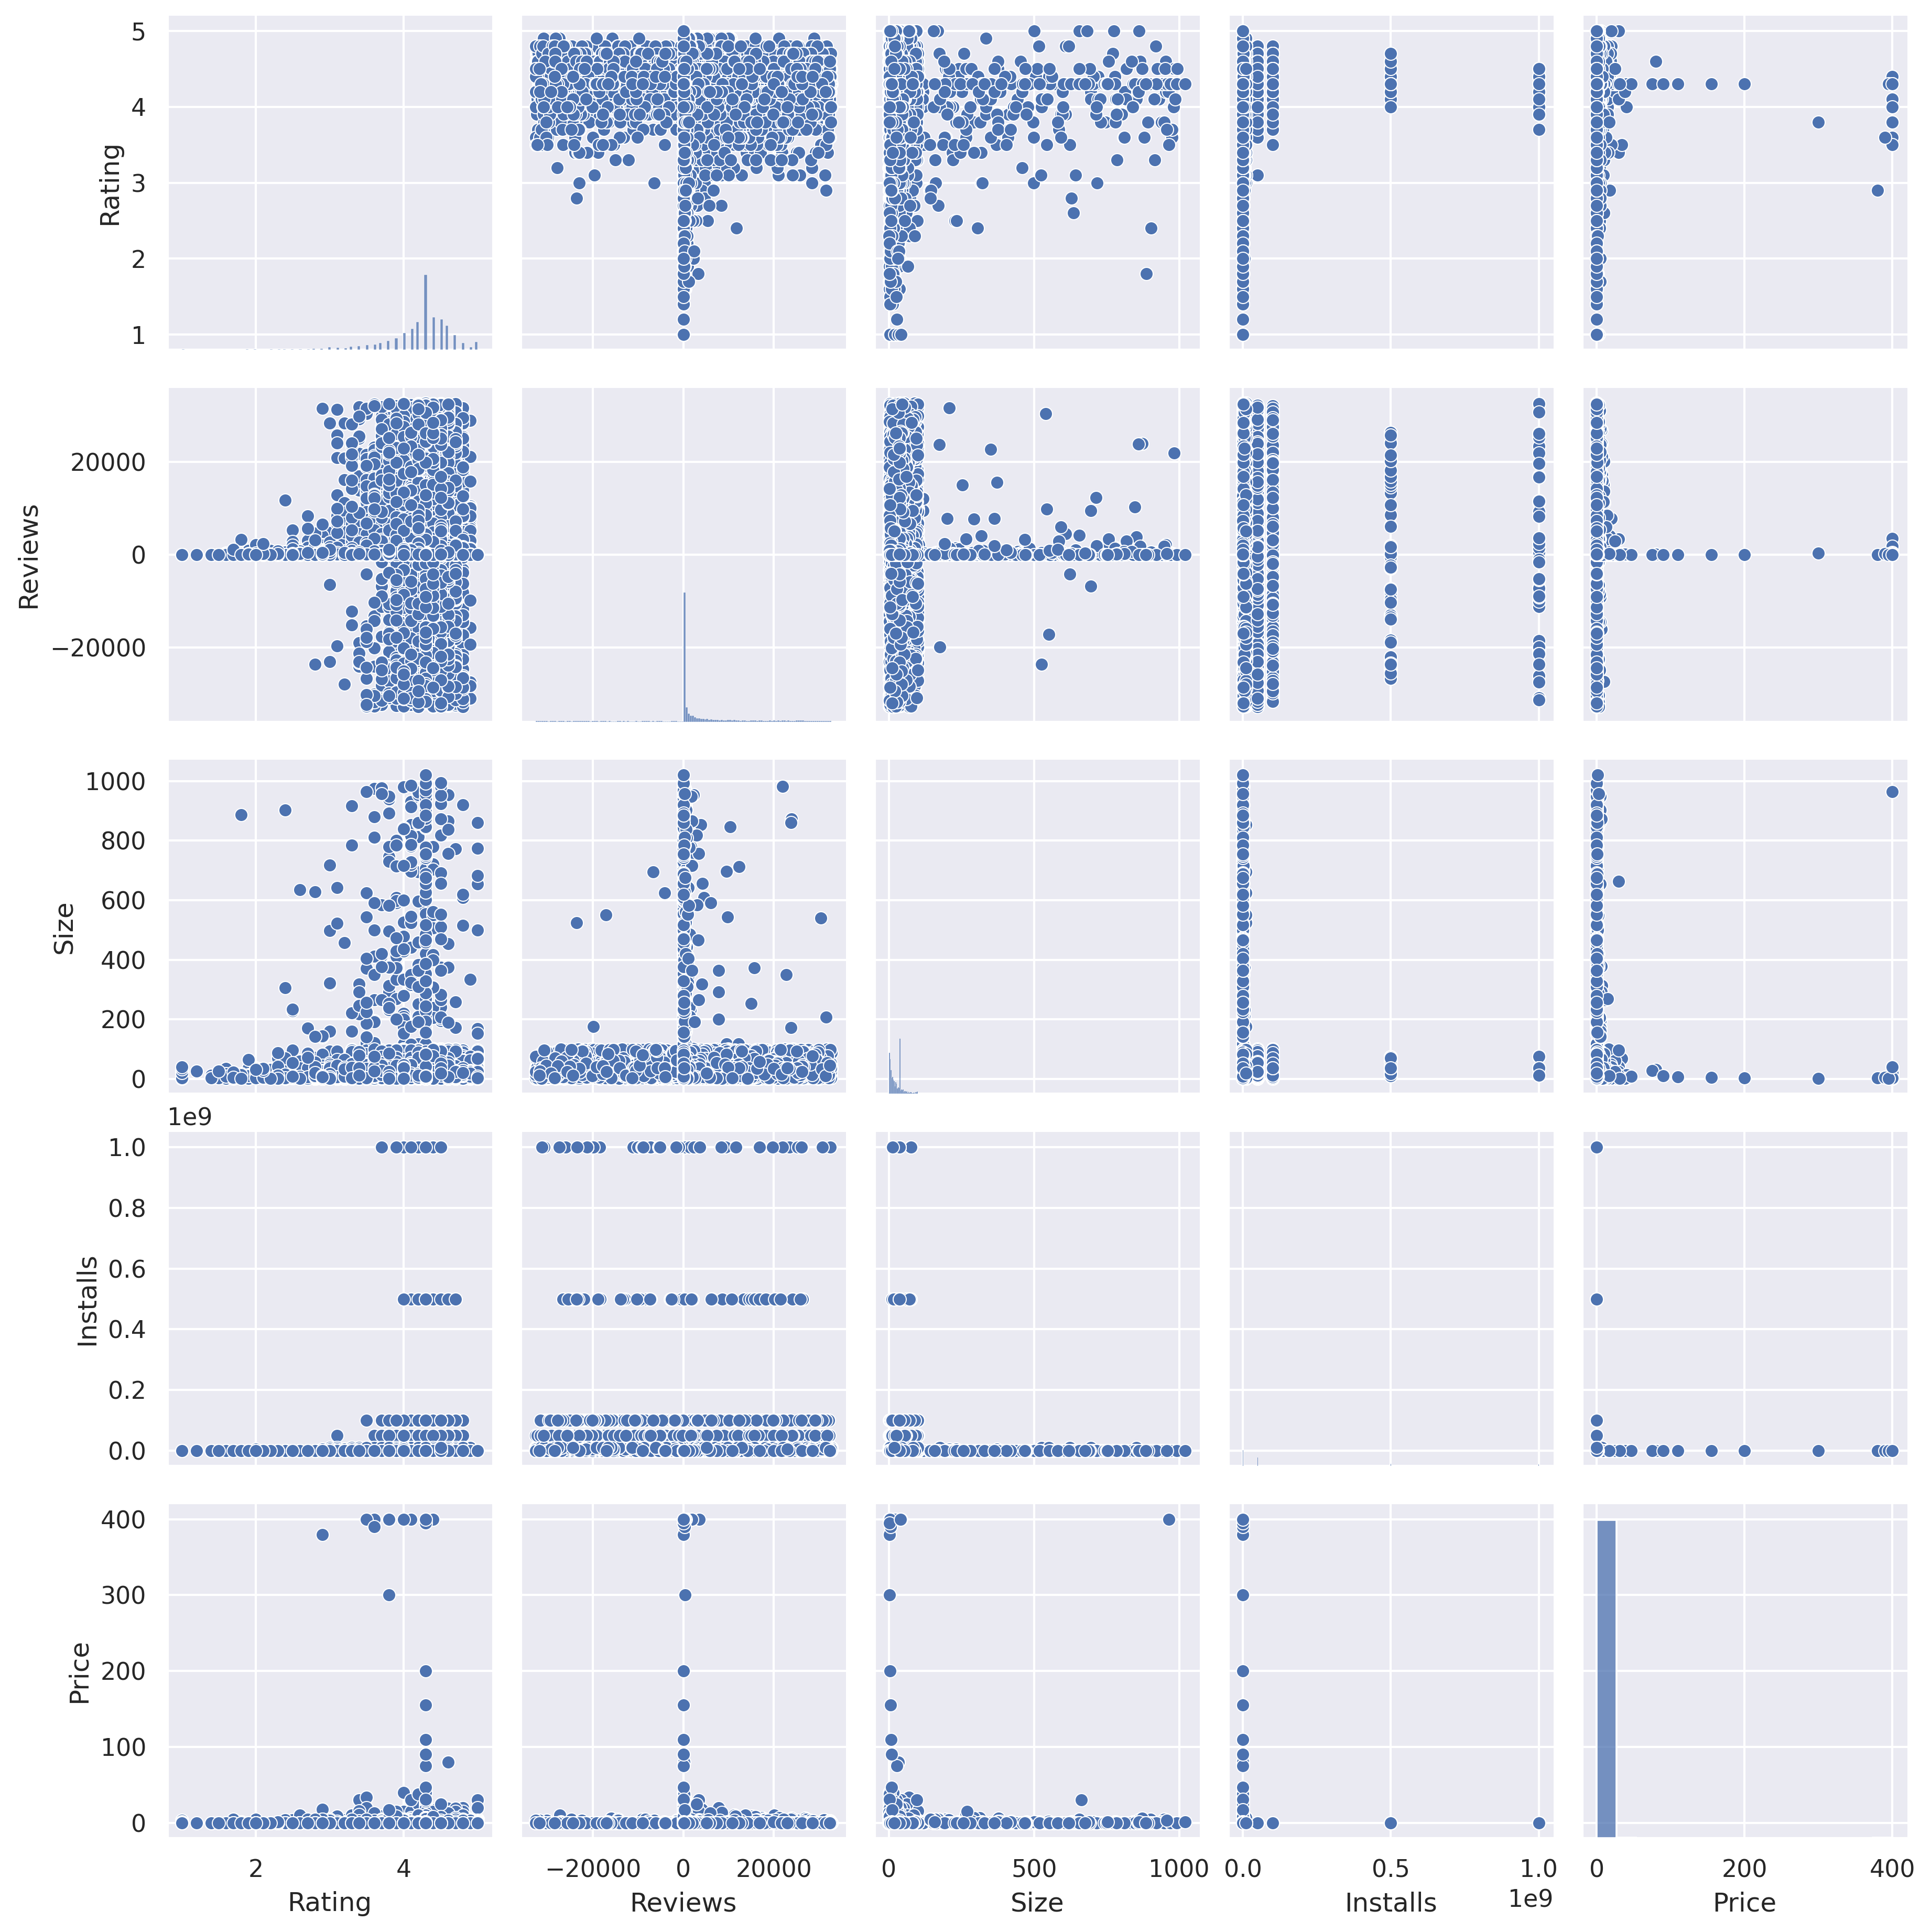

In [594]:
sns.pairplot(df)

In [595]:
# Thank you for your time